In [138]:
# Deep Learning Spam Assasing Project
# Goal: Improve model

# Suggestions for improvemements: 
# Improve recall for ham messages by data augmentation or hyperparameter tuning
# Additional:
# Removing tags "<>" in datasets 

In [139]:
# Activity plan:
# Step I : Data augmentation

# Step II : Model check
#     * Conclusions

# Step III : Project documentation
#     * Add comments to code

In [140]:
# import packages
import pandas as pd # manipulating the data purpose
import csv
import os
import numpy as np
from sklearn.model_selection import train_test_split # Split test/train data randomly
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from sklearn.naive_bayes import MultinomialNB # add classifier for classification of words
import re

In [141]:
# Step I : Data collection and data pre processing.
#     * Gather data



In [142]:
# Define input directory containing the files and output CSV file path
input_directory_non_spam = 'C:/VirtualServer/src_spam_assasin/srcdata/easy_ham'
input_directory_spam = 'C:/VirtualServer/src_spam_assasin/srcdata/spam'
output_csv_non_spam = 'output_emails_non_spam.csv'
output_csv_spam = 'output_emails_spam.csv'

In [143]:
def load_emails_data(input_directory):
    '''
    Load all emails from given directory

    Returns
    List of emails dataset
    '''
    
    # List to hold all rows of data
    emails_dataset = []

    # Iterate over all files in the input directory
    for filename in os.listdir(input_directory):
        file_path = os.path.join(input_directory, filename)
        # Only process if it's a file
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_content = file.read().strip()
                # Replace newlines with spaces to have one constant text
                file_content_single_line = file_content.replace('\n', ' ')
                file_conent_no_tags = re.sub(r'<.*?>', '', file_content_single_line )
                file_content_no_sign = file_conent_no_tags.replace(',', ' ')
                emails_dataset.append(file_content_no_sign)
    return emails_dataset

In [144]:
# Load ONLY ham emails
emails_dataset_raw_ham =  load_emails_data(input_directory_non_spam)

counter = 0
for element in emails_dataset_raw_ham:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002 Return-Path:  Delivered-To: zzzz@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) 	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36 	for ; Thu  22 Aug 2002 07:36:16 -0400 (EDT) Received: from phobos [127.0.0.1] 	by localhost with IMAP (fetchmail-5.9.0) 	for zzzz@localhost (single-drop); Thu  22 Aug 2002 12:36:16 +0100 (IST) Received: from listman.example.com (listman.example.com [66.187.233.211]) by     dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for     ; Thu  22 Aug 2002 12:34:53 +0100 Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by     listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu  22 Aug 2002     07:35:02 -0400 (EDT) Delivered-To: exmh-workers@listman.example.com Received: from int-mx1.corp.example.com (int-mx1.corp.example.com     [172.16.52.254]) by listman.redhat.co

In [145]:
# Load ONLY spam emails
emails_dataset_raw_spam =  load_emails_data(input_directory_spam)

counter = 0
for element in emails_dataset_raw_ham:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002 Return-Path:  Delivered-To: zzzz@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) 	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36 	for ; Thu  22 Aug 2002 07:36:16 -0400 (EDT) Received: from phobos [127.0.0.1] 	by localhost with IMAP (fetchmail-5.9.0) 	for zzzz@localhost (single-drop); Thu  22 Aug 2002 12:36:16 +0100 (IST) Received: from listman.example.com (listman.example.com [66.187.233.211]) by     dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for     ; Thu  22 Aug 2002 12:34:53 +0100 Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by     listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu  22 Aug 2002     07:35:02 -0400 (EDT) Delivered-To: exmh-workers@listman.example.com Received: from int-mx1.corp.example.com (int-mx1.corp.example.com     [172.16.52.254]) by listman.redhat.co

In [146]:
# Data are loaded and divided to HAM and SPAM
# SPAM : emails_dataset_raw_spam 
# HAM : emails_dataset_raw_ham



In [147]:
# Step I : Data collection and data pre processing.
#     * Clean data



In [148]:
# extracting pure email body - cleaning the data
def extract_pure_email(raw_emails):
    key_word = 'Date:'
    cleaned_email = []
    for email in raw_emails:
        # Find the line with "Subject:" and extract everything from that line onward
        subject_start = re.search(key_word, email, re.MULTILINE)
        if subject_start:
            extracted_content = email[subject_start.start():]
            cleaned_email.append(extracted_content)
    return cleaned_email

In [149]:
cleaned_ham_dataset = extract_pure_email(emails_dataset_raw_ham)

counter = 0
for element in cleaned_ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues      Message-ID:       | I can't reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That's where the "1 hit" comes from (obviously).  The version of nmh I'm using is ...  delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun 

In [150]:
cleaned_spam_dataset = extract_pure_email(emails_dataset_raw_spam)

counter = 0
for element in cleaned_ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues      Message-ID:       | I can't reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That's where the "1 hit" comes from (obviously).  The version of nmh I'm using is ...  delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun 

In [151]:
# checking dataset - how many raws in each HAM / SPAM dataset.
spam_emails_quantity = len(cleaned_spam_dataset)
ham_emails_quantity = len(cleaned_ham_dataset)
print(f"Spam dataset emails quantity: {spam_emails_quantity}")
print(f"Spam dataset emails quantity: {ham_emails_quantity}")


Spam dataset emails quantity: 500
Spam dataset emails quantity: 2550


In [152]:
# Data are cleaned and divided to HAM and SPAM
# SPAM : cleaned_spam_dataset
# HAM : cleaned_ham_dataset




In [ ]:
# Data augmentation

In [153]:
# Data augmentation to increase the diversity and volumen of spam data
# the goal is to increase spam data from 500 to 2500
# "Back Translation"
# Translating ham from english to polish and then back to english language.
# this will create additional 500 spam emails with paraphrased worlds
# Example:
# "I can't -> I cannot", 
# "reapeatable -> repetive", 
# " I haven't been able to reach the cvs repository today (local routing issue I think) -> I failed to connect to the CVS repository (probably a problem with local routing).

In [154]:
from googletrans import Translator
import asyncio

In [155]:
async def translate_to_given_language(text, destination_language):
    """ 
    Translate the given text to the specified destination language. 
    Arguments: 
        text (str): The text to translate. 
        dest_language (str): The language code for the destination language (e.g., 'es' for Spanish, 'fr' for French). 
    Returns: 
        str: The translated text. 
    """
    
    translator = Translator()
    translation = await translator.translate(text, dest=destination_language)
    return translation.text

In [156]:
async def translate_dataset(dataset, destination_language): 
    """ Translate a dataset of text to the specified destination language. 
    Arguments: 
        dataset (list): A list of text to translate. 
        destination_language (str): The language code for the destination language (e.g., 'pl' for Polish). 
        
    Returns: list: A list of translated text. 
    """ 
    
    tasks = [translate_to_given_language(text, destination_language) for text in dataset] 
    translated_dataset = await asyncio.gather(*tasks) 
    
    return translated_dataset

In [157]:
import time
from httpx import InvalidURL

# Translating SPAM dataset of 500 emails to Polish language in batches of 100 
batch_size = 100
dataset_translated_pl = [] 
for i in range(0, len(cleaned_spam_dataset), batch_size): 
    batch = cleaned_spam_dataset[i:i + batch_size] 
    try:
        translated_batch = await translate_dataset(batch, "pl") 
    except InvalidURL:
        # Retry with shorter text segments if URL is too long 
        translated_batch = [] 
        for text in batch: 
            try: 
                translated_txt = await translate_to_given_language(text, "pl") 
                translated_batch.append(translated_txt) 
            except InvalidURL: 
                print(f"Skipping text due to URL length issue")
    
    dataset_translated_pl.extend(translated_batch)
    print("10 seconds sleep to calm server down :)")
    time.sleep(10)

10 seconds sleep to calm server down :)
10 seconds sleep to calm server down :)
Skipping text due to URL length issue
Skipping text due to URL length issue
10 seconds sleep to calm server down :)
Skipping text due to URL length issue
Skipping text due to URL length issue
Skipping text due to URL length issue
10 seconds sleep to calm server down :)
Skipping text due to URL length issue
10 seconds sleep to calm server down :)


In [158]:
# checking dataset - how many raws in each HAMs in dataset.
dataset_translated_pl_quantity = len(dataset_translated_pl)

print(f"Spam dataset translated emails quantity: {dataset_translated_pl_quantity}")

Spam dataset translated emails quantity: 494


In [159]:
# translate back from polish to english

In [160]:
# Translating SPAM dataset of 500 emails to English language in batches of 100 
batch_size = 100
dataset_translated_eng = [] 
for i in range(0, len(dataset_translated), batch_size): 
    batch = dataset_translated[i:i + batch_size] 
    try:
        translated_batch = await translate_dataset(batch, "en") 
    except InvalidURL:
        # Retry with shorter text segments if URL is too long 
        translated_batch = [] 
        for text in batch: 
            try: 
                translated_txt = await translate_to_given_language(text, "en") 
                translated_batch.append(translated_txt) 
            except InvalidURL: 
                print(f"Skipping text due to URL length issue")
    
    dataset_translated_eng.extend(translated_batch)
    print("10 seconds sleep to calm server down :)")
    time.sleep(10)

10 seconds sleep to calm server down :)
10 seconds sleep to calm server down :)
10 seconds sleep to calm server down :)
10 seconds sleep to calm server down :)
10 seconds sleep to calm server down :)


In [173]:
# checking dataset - how many raws in each HAMs in dataset.
dataset_translated_en_quantity = len(dataset_translated_eng)

print(f"Spam dataset translated emails quantity: {dataset_translated_en_quantity}")

Spam dataset translated emails quantity: 494


In [174]:
# Merge augement SPAM dataset to main SPAM dataset
cleaned_spam_dataset.extend(dataset_translated_eng)

merged_spam_dataset = len(cleaned_spam_dataset)
print(f"Merged spam dataset  emails quantity: {merged_spam_dataset}")

Merged spam dataset  emails quantity: 994


In [175]:
# Step I : Data collection and data pre processing.
#     * Lebel the data



In [176]:
# Labeling the data
def label_dataset(dataset, label):
    labeled_dataset = []
    
    for email in dataset:
        labeled_dataset.append([email, label])
    return labeled_dataset

In [177]:
spam_dataset = label_dataset(cleaned_spam_dataset, 1)
ham_dataset = label_dataset(cleaned_ham_dataset, 0)

In [178]:
# checking dataset - how many raws in each HAM / SPAM dataset.
spam_emails_quantity = len(spam_dataset)
ham_emails_quantity = len(ham_dataset)
print(f"Spam dataset emails quantity: {spam_emails_quantity}")
print(f"Spam dataset emails quantity: {ham_emails_quantity}")

Spam dataset emails quantity: 994
Spam dataset emails quantity: 2550


In [179]:
counter = 0
for element in spam_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
['Date: Wed  21 Aug 2002 20:31:57 -1600 MIME-Version: 1.0 Message-ID:  Content-Type: text/html; charset="iso-8859-1" Content-Transfer-Encoding: quoted-printable                                                   Save up to 70% on Life Insurance. Why Spend More Than You Have To?  Life Quote Savings                     Ensurin= g your        family\'s financial security is very important. Life Quote Savings ma= kes        buying life insurance simple and affordable. We Provide FREE Access = to The        Very Best Companies and The Lowest Rates.                                            Life Quote Savings is FAST  EAS= Y and              SAVES you money! Let us help you get started with the best val= ues in              the country on new coverage. You can SAVE hundreds or even tho= usands              of dollars by requesting a FREE quote from Lifequote Savings. = Our              service will take you less than 5 minutes to compl

In [180]:
counter = 0
for element in ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
['Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues      Message-ID:       | I can\'t reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m using is ...  delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at

In [181]:
# Data are labeled
# labeled SPAM : spam_dataset
# labeled HAM : ham_dataset




In [182]:
# saving dataset for HAM and SPAM to csv file
import csv

def save_dataset_to_csv(dataset, filename):
    '''
    Save given dataset to csv file

    Parameters:
        dataset : string dataser
        filename : string file name
    '''
    
    with open(filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['text', 'label'])  # Write header
        writer.writerows(dataset)

In [183]:
# Saving HAM
save_dataset_to_csv(ham_dataset, 'ham_dataset.csv')
# Saving SPAM
save_dataset_to_csv(spam_dataset, 'spam_dataset.csv')

In [184]:
# *******************************

In [185]:
# Dataset preparation and check

In [186]:
# load datasets
file_spam = pd.read_csv("spam_dataset.csv")
file_ham = pd.read_csv("ham_dataset.csv")

# merging spam and ham
spam_df = pd.concat([file_spam, file_ham], ignore_index=True) 

In [187]:
# Word cloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

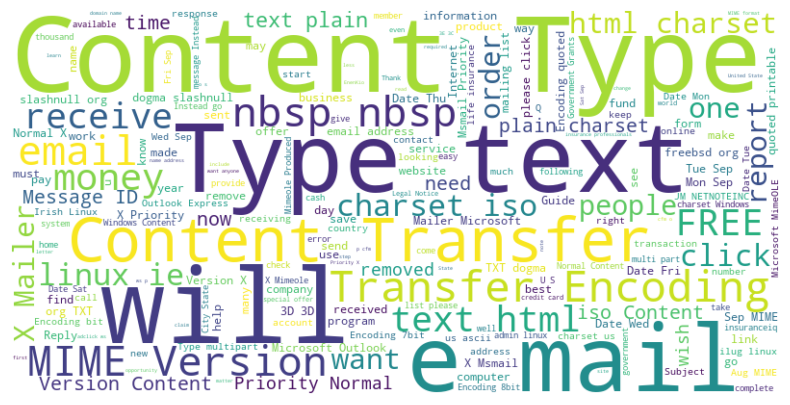

In [188]:
# Word cloud - SPAM

# Combine all text from the dataset 
all_text = ' '.join(file_spam['text'].tolist()) # text - column name with string words
# Create the word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text) 
# Display the word cloud 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

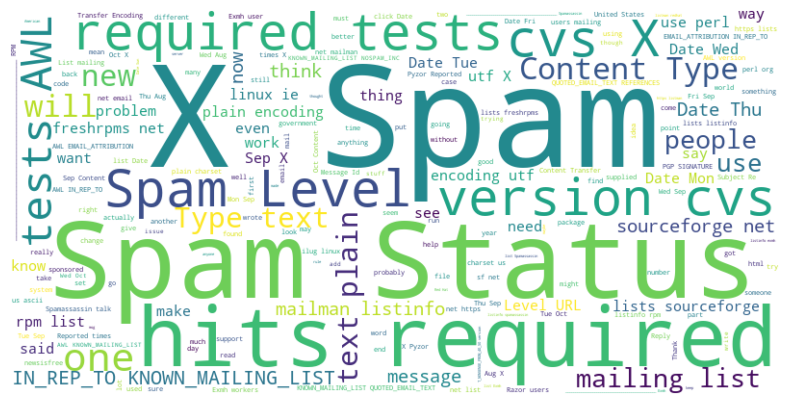

In [189]:
# Word cloud - HAM

# Combine all text from the dataset 
all_text = ' '.join(file_ham['text'].tolist()) # text - column name with string words
# Create the word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text) 
# Display the word cloud 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

<Axes: ylabel='count'>

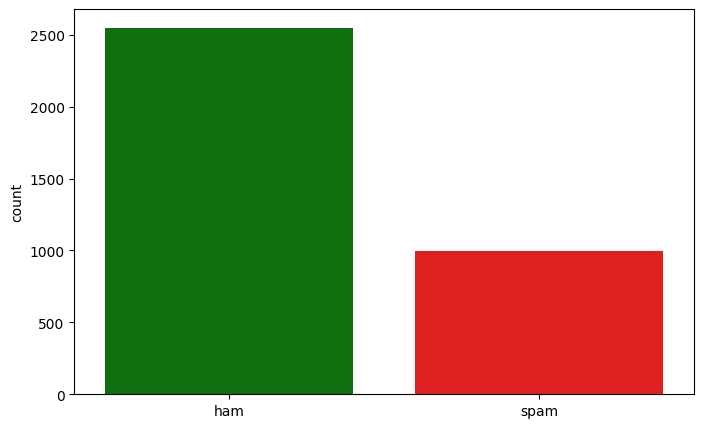

In [190]:
# Show how many spam / ham emails is in given data
import matplotlib.pyplot as plt
import seaborn as sea
labels = ['ham', 'spam']
colors = ['green', 'red']
plt.figure(figsize=(8, 5)) 
data = ['ham'] * len(file_ham) + ['spam'] * len(file_spam) 
sea.countplot(x=data, hue=data, palette=colors, legend=False)

In [191]:
# Check datasets
spam_df.head()

,text,label
0,Date: Wed 21 Aug 2002 20:31:57 -1600 MIME-Ver...,1
1,Date: Thu 22 Aug 2002 06:18:18 -0600 Message-...,1
2,Date: Thu 22 Aug 2002 07:36:19 -0600 Message-...,1
3,Date: Thu 22 Aug 2002 08:13:35 -0700 X-Mailer...,1
4,Date: Thu 22 Aug 2002 09:33:07 -0600 Message-...,1


In [192]:
# Inspect data
spam_df.shape

(3544, 2)

In [193]:
# goup by category. 0 - no spam, 1 - spam
spam_df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      2550   2548  Date: Thu  22 Aug 2002 14:55:23 -0700 Date: Th...    2
1       994    952  Date: Fri  19 Jul 2002 03:28:09 -0400 (EDT) Me...    4

In [194]:
# Step II : Model selection.
#     * Choose model(RNN, CNN, LSTM)
#     * Model implementation




In [215]:
# RNN Network implementation - second approach | Batter results

In [216]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as n

In [217]:
# 1. Data Preparation
spam_df = pd.concat([file_spam, file_ham], ignore_index=True)
texts = spam_df['text'].values
labels = spam_df['label'].values

In [218]:
# Tokenization and Padding
max_words = 10000  # Maximum number of words to be used
max_len = 500  # Maximum length of all sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [219]:
# 2. Model Architecture
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\lzloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [220]:
# 3. Training the Model
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.7655 - loss: 0.4358 - val_accuracy: 0.9676 - val_loss: 0.1266
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9923 - loss: 0.0357 - val_accuracy: 0.9605 - val_loss: 0.1531
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.9689 - loss: 0.0888 - val_accuracy: 0.6841 - val_loss: 0.5866
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.6489 - loss: 0.7488 - val_accuracy: 0.8618 - val_loss: 0.3366
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8440 - loss: 0.3335 - val_accuracy: 0.9013 - val_loss: 0.2118


In [221]:
# *************************************************************************************

In [222]:
# Step IV : Model quality evaluation

In [223]:
from sklearn.metrics import classification_report, confusion_matrix

# loss, accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix 
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8998 - loss: 0.2019
Test Accuracy: 90.13%
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       483
           1       0.92      0.76      0.83       226

    accuracy                           0.90       709
   macro avg       0.91      0.86      0.88       709
weighted avg       0.90      0.90      0.90       709

Confusion Matrix:
[[468  15]
 [ 55 171]]


In [224]:
# Model quality evaluation SUMMARY:

# Precision:
# HAM  : 0.92
# SPAM : 0.82
# summary : Model have good precision for ham but lower precision for spam

# Recall:
# HAM  : 0.97
# SPAM : 0.63
# lower recall for spam, missing significatn number of spam messages
# summary : need to improve the balance by tuning spam recalls

# F1-Score:
# HAM  : 0.94
# SPAM : 0.71
# Summary : need improvements to detect spam

# Confusion matrix:
# Improvements need to be implemented in detecting spam messages ex improve recall 

# Overall accuracy:
# 90.51% 
# Model is performing well overall

# SUMMARY:
# Model perform well in indentify ham messages byt there is need to improve indentification of spam messages
# Suggestions fro improvemements: 
# Improve recall for ham messages by data augmentation or hyperparameter tuning

In [225]:
# *************************************************************************************

In [226]:
# Step V : Model check

In [227]:
def check_if_spam(string_to_check, model, max_len):
    # Tokenize and pad the string_to_check text
    input_sequence = tokenizer.texts_to_sequences([string_to_check])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_len)
    
    # Predict using the trained model
    prediction = model.predict(padded_input_sequence)

    # Determine if it is spam or not (assuming threshold of 0.5 for binary classification)
    is_spam = prediction[0][0] > 0.10
    if is_spam:
        print("The email IS SPAM.")
    else:
        print("The email is NOT a spam.")

    print("SPAM probability: ", prediction)
    

In [228]:
string_not_spam1 = "Hey! lets have a beer together today. Are you in?"
check_if_spam(string_not_spam1, model, max_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The email is NOT a spam.
SPAM probability:  [[0.09779549]]


In [229]:
string_not_spam2 = "See google drive folder for our photos from holidays."
check_if_spam(string_not_spam2, model, max_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The email IS SPAM.
SPAM probability:  [[0.39467162]]


In [230]:
string_spam1 = "Click here for best buy"
check_if_spam(string_spam1, model, max_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The email IS SPAM.
SPAM probability:  [[0.28848457]]


In [231]:
string_spam2 = "Want to be reach? Visit this page."
check_if_spam(string_spam2, model, max_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The email IS SPAM.
SPAM probability:  [[0.5161866]]


In [232]:
# *************************************************************************************

In [233]:
# Step VI : Model check
#     * Conclusions

In [234]:
# SUMMARY:
# Model perform well in indentify ham messages byt there is need to improve indentification of spam messages
# Suggestions fro improvemements: 
# Improve recall for ham messages by data augmentation or hyperparameter tuning